In [78]:
import pandas as pd

# Load the data from the CSV file
file_path = 'Otherdata/bank-additional-full.csv'
data = pd.read_csv(file_path, delimiter=';')  # Assuming delimiter is semicolon based on common format

# Display basic information and the first few rows of the dataset
# data_info = data.info()
# data_head = data.head()
# data_info, data_head

data


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [79]:
data['cons.price.idx'].unique()

array([93.994, 94.465, 93.918, 93.444, 93.798, 93.2  , 92.756, 92.843,
       93.075, 92.893, 92.963, 92.469, 92.201, 92.379, 92.431, 92.649,
       92.713, 93.369, 93.749, 93.876, 94.055, 94.215, 94.027, 94.199,
       94.601, 94.767])

In [80]:
data_no = data[data['y'] == 'no']
data_yes = data[data['y'] == 'yes']


In [74]:
# def remove_outliers(df, column):
#     Q1 = df[column].quantile(0.25)
#     Q3 = df[column].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [75]:
# data = remove_outliers(data, 'age')


# **Yes_Split**

## **Opitimal K**

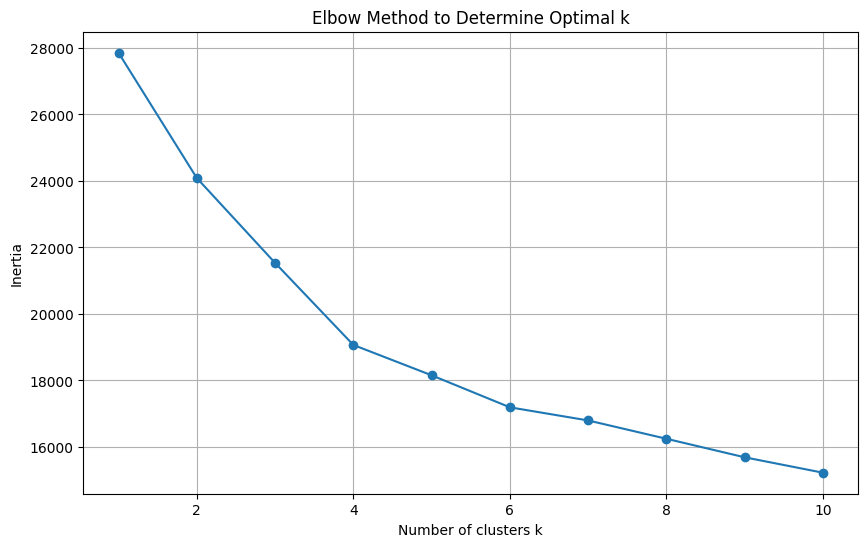

In [81]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Selecting the columns
features = ['age', 'job', 'education', 'marital', 'housing', 'loan', 'cons.price.idx', 'campaign']

# Subset the data with selected features
data_subset = data_yes[features]

# Define the column transformer: one-hot encode categorical features and scale numerical ones
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age', 'cons.price.idx', 'campaign']),
        ('cat', OneHotEncoder(), ['job', 'education', 'marital', 'housing', 'loan'])
    ])

# Fit and transform the data
data_processed = preprocessor.fit_transform(data_subset)

# Check the transformed data shape and type to confirm
data_processed.shape, type(data_processed)

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Setting a range for possible k values
k_values = range(1, 11)
inertias = []

# Calculate the inertia for each k
for k in k_values:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(data_processed)
    inertias.append(model.inertia_)

# Plotting the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertias, marker='o')
plt.title('Elbow Method to Determine Optimal k')
plt.xlabel('Number of clusters k')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()



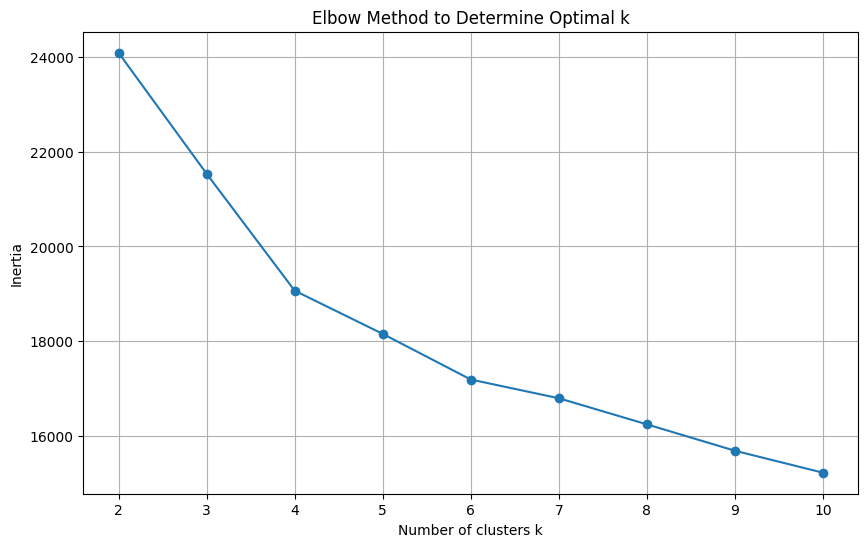

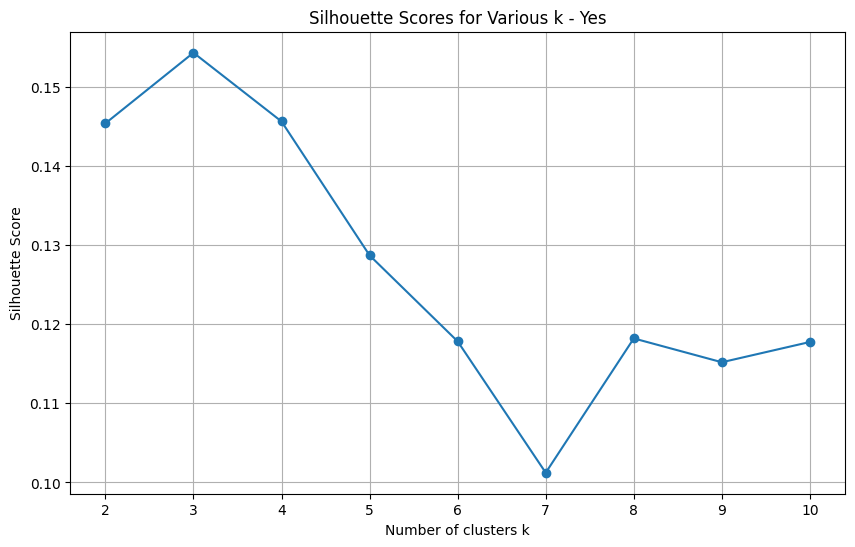

In [82]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Setting a range for possible k values
k_values = range(2, 11)  # Starting from 2 because silhouette score is not defined for k=1
inertias = []
silhouette_scores = []

# Calculate the inertia and silhouette score for each k
for k in k_values:
    model = KMeans(n_clusters=k, random_state=42)
    cluster_labels = model.fit_predict(data_processed)
    inertias.append(model.inertia_)
    silhouette_scores.append(silhouette_score(data_processed, cluster_labels))

# Plotting the elbow graph for Inertia
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertias, marker='o')
plt.title('Elbow Method to Determine Optimal k')
plt.xlabel('Number of clusters k')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# Plotting the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Various k - Yes')
plt.xlabel('Number of clusters k')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()



## **Cluster Characteristics**

In [83]:
# Subset the data with selected features and preprocess
features = ['age', 'job', 'education', 'marital', 'housing', 'loan', 'cons.price.idx', 'campaign']
data_subset = data[features]

# Define the column transformer: one-hot encode categorical features and scale numerical ones
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age', 'cons.price.idx', 'campaign']),
        ('cat', OneHotEncoder(), ['job', 'education', 'marital', 'housing', 'loan'])
    ])

# Fit and transform the data
data_processed = preprocessor.fit_transform(data_subset)

# Assuming k=3 from previous optimal k analysis or a typical starting point for exploration
k = 3
model = KMeans(n_clusters=k, random_state=42)
cluster_labels = model.fit_predict(data_processed)

# Adding cluster labels to the original DataFrame for analysis
data['Cluster'] = cluster_labels

# Aggregating data to summarize cluster characteristics
cluster_summary = data.groupby('Cluster').agg({
    'age': ['mean', 'median'],
    'cons.price.idx': ['mean', 'median'],
    'campaign': ['mean', 'median'],
    'job': lambda x: x.value_counts().index[0],  # Most common category
    'education': lambda x: x.value_counts().index[0],
    'marital': lambda x: x.value_counts().index[0],
    'housing': lambda x: x.value_counts().index[0],
    'loan': lambda x: x.value_counts().index[0]
})

cluster_summary


age        cons.price.idx          campaign         \
              mean median           mean  median      mean median   
Cluster                                                             
0        35.229038   35.0      94.081301  93.994  3.225426    2.0   
1        53.253266   52.0      93.573058  93.444  2.296812    2.0   
2        34.563160   34.0      93.025779  92.963  2.068371    2.0   

                 job          education  marital  housing     loan  
            <lambda>           <lambda> <lambda> <lambda> <lambda>  
Cluster                                                             
0        blue-collar        high.school  married       no       no  
1        blue-collar  university.degree  married      yes       no  
2             admin.  university.degree  married      yes       no

# **No_Split**

In [84]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Selecting the columns
features = ['age', 'job', 'education', 'marital', 'housing', 'loan']

# Subset the data with selected features
data_subset = data_no[features]

# Define the column transformer: one-hot encode categorical features and scale numerical ones
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age']),
        ('cat', OneHotEncoder(), ['job', 'education', 'marital', 'housing', 'loan'])
    ])

# Fit and transform the data
data_processed = preprocessor.fit_transform(data_subset)

# Check the transformed data shape and type to confirm
data_processed.shape, type(data_processed)

((36548, 31), scipy.sparse._csr.csr_matrix)

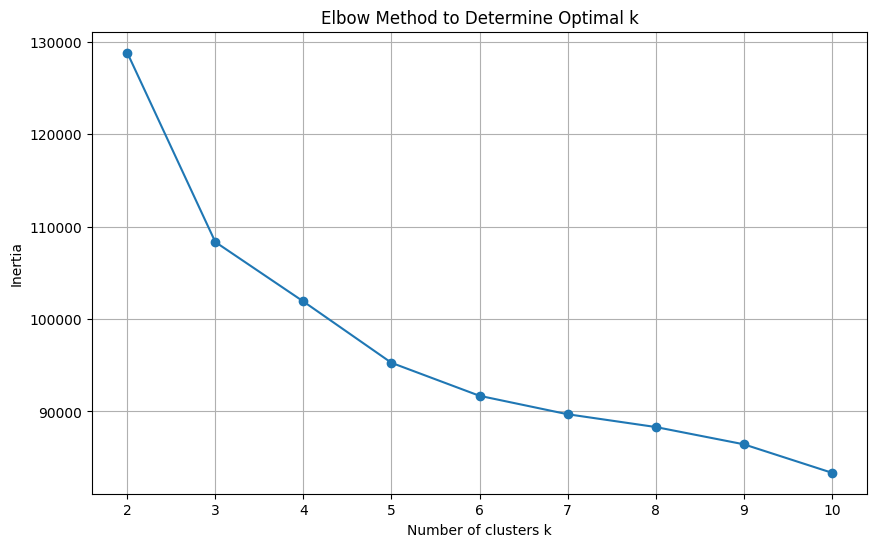

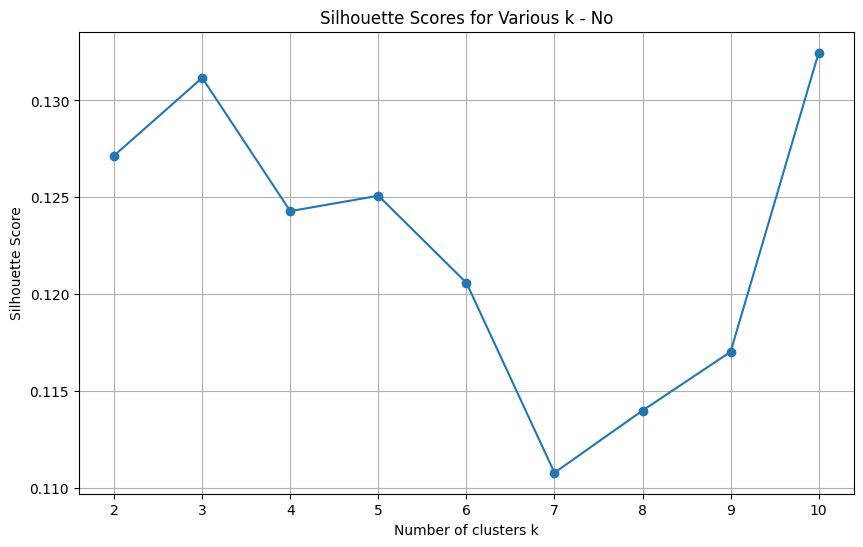

In [85]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Setting a range for possible k values
k_values = range(2, 11)  # Starting from 2 because silhouette score is not defined for k=1
inertias = []
silhouette_scores = []

# Calculate the inertia and silhouette score for each k
for k in k_values:
    model = KMeans(n_clusters=k, random_state=42)
    cluster_labels = model.fit_predict(data_processed)
    inertias.append(model.inertia_)
    silhouette_scores.append(silhouette_score(data_processed, cluster_labels))

# Plotting the elbow graph for Inertia
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertias, marker='o')
plt.title('Elbow Method to Determine Optimal k')
plt.xlabel('Number of clusters k')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# Plotting the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Various k - No')
plt.xlabel('Number of clusters k')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


## **Cluster Characteristics**

In [86]:
# Subset the data with selected features and preprocess
features = ['age', 'job', 'education', 'marital', 'housing', 'loan', 'cons.price.idx', 'campaign']
data_subset = data[features]

# Define the column transformer: one-hot encode categorical features and scale numerical ones
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age', 'cons.price.idx', 'campaign']),
        ('cat', OneHotEncoder(), ['job', 'education', 'marital', 'housing', 'loan'])
    ])

# Fit and transform the data
data_processed = preprocessor.fit_transform(data_subset)

# Assuming k=3 from previous optimal k analysis or a typical starting point for exploration
k = 3
model = KMeans(n_clusters=k, random_state=42)
cluster_labels = model.fit_predict(data_processed)

# Adding cluster labels to the original DataFrame for analysis
data['Cluster'] = cluster_labels

# Aggregating data to summarize cluster characteristics
cluster_summary = data.groupby('Cluster').agg({
    'age': ['mean', 'median'],
    'cons.price.idx': ['mean', 'median'],
    'campaign': ['mean', 'median'],
    'job': lambda x: x.value_counts().index[0],  # Most common category
    'education': lambda x: x.value_counts().index[0],
    'marital': lambda x: x.value_counts().index[0],
    'housing': lambda x: x.value_counts().index[0],
    'loan': lambda x: x.value_counts().index[0]
})

cluster_summary


age        cons.price.idx          campaign         \
              mean median           mean  median      mean median   
Cluster                                                             
0        35.229038   35.0      94.081301  93.994  3.225426    2.0   
1        53.253266   52.0      93.573058  93.444  2.296812    2.0   
2        34.563160   34.0      93.025779  92.963  2.068371    2.0   

                 job          education  marital  housing     loan  
            <lambda>           <lambda> <lambda> <lambda> <lambda>  
Cluster                                                             
0        blue-collar        high.school  married       no       no  
1        blue-collar  university.degree  married      yes       no  
2             admin.  university.degree  married      yes       no